**Ejercicio 1.** Escribe una función derivadaNumerica que reciba: una función $f\colon \mathbb{R}\mapsto\mathbb{R}$, un punto $x_0\in\mathbb{R}$ y un número $h\in\mathbb{R}$. Esta función deberá calcular una aproximación a la derivada utilizando la definición indicada arriba ignorando la parte del límite. Es decir, algo como: derivada_numerica(f,x,h).

In [1]:
function derivadaNumerica(f::Function,x::Float64,h::Float64)
    
  return (f(x+h)-f(x))/h  
    
end

derivadaNumerica (generic function with 1 method)

**Ejercicio 2.** Utiliza tu función derivadaNumerica para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$: $$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$ respecto a $h$.

In [2]:
#Valor aproximado de la derivada 
println("El valor aproximado, con delta 0.01 seria ",derivadaNumerica(x->cos(x),1/2,0.01))

#Valor real de la derivada 

println("El valor real es : ",-sin(1/2))

El valor aproximado, con delta 0.01 seria -0.769805424462147
El valor real es : -0.479425538604203


In [20]:

using SymPy
using PyPlot
plt = PyPlot

A,x,a,n,m=symbols("A,x,a,n,m")

function errorDerivadaNumerica(f::Function,punto)
    
    y = simplify(diff(f),[x])    
    errores = []
    inversosDeltas = []
    derivadasNumericas = []
    delta = 20.0
    
    while (delta>0.001)
        
        push!(derivadasNumericas,derivadaNumerica(f,punto,delta))
        push!(errores,abs((derivadaNumerica(f,punto,delta)-y(punto))/y(punto)))
        push!(inversosDeltas, 1/delta)
        
        delta-=0.01
    end


    #=Una vez que hemos recolectado todos los errores y derivadas vamos a graficar=#
   
     #Grafico de puntos convergiendo
    plt.figure("the plot")
    plt.xlabel("1/delta")
    plt.title("Graficos de convergencia de derivada y error")
    plt.grid()
    plt.scatter(inversosDeltas,derivadasNumericas,color = "blue",label = "Derivada Numerica",s = 10)
    
    #Gráfico de error
    plt.scatter(inversosDeltas,errores,color = "orange",label = "Error",s=10)
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    plt.show()
    
end 

errorDerivadaNumerica (generic function with 1 method)

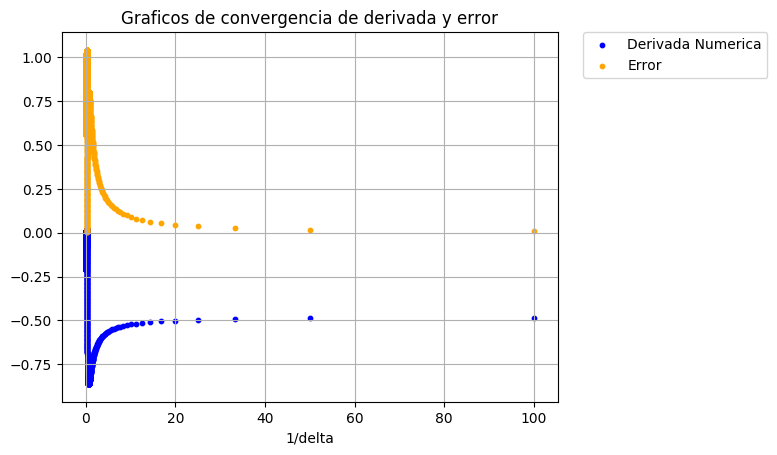

In [21]:
#=Ejecutamos nuestra funcion errorDerivadaNumerica con la funcion coseno =#

errorDerivadaNumerica(x->cos(x),1/2)

En efecto el error es de orden h, esto se puede ver en el hecho de que al graficar el error contra $\frac{1}{\Delta}$ se obtiene una hiperbola. Tratemos de explicar esto un poco mejor. El grafico muestra $error(\frac{1}{\Delta})  = k*\frac{1}{\Delta}$. Si  hacemos el cambio de variable $h = 1/\Delta$, que era lo que manejabamos antes de invertir el delta, entonces $error(h) = kh$, lo cual es orden h. 


**Ejercicio 3.** Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica? Comenta.
Tip: ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series?

Vamos a seguir el consejo que nos dan. Primero hacemos las expansiones de Taylor para $f(x+h)$ y $f(x-h)$.

$$f(x+h) = f(x) +f'(x)h +\frac{1}{2}f''(x)h^2 + \mathcal{O(h^3)}$$

$$f(x-h)  = f(x) -f'(x)h + \frac{1}{2}f''(x)h^2 +\mathcal{O}(h^3)$$

Sumando las expresiones anteriores nos queda 

$$f(x+h) +f(x-h) = 2f(x) +f''(x)h^2 + \mathcal{O}(h^3)$$

De donde aproximamos la segunda derivada como 

$$f''(x) \approx \frac{f(x+h)+f(x-h)-2f(x)}{h^2}$$

Ahora vamos a sustituir esto en la expansión de Taylor de f(x+h). Se obtiene:

$$f(x+h) =f(x) +f´(x)h +\frac{1}{2}\left(\frac{f(x+h)+f(x-h)-2f(x)}{h^2}\right)h^2 +\mathcal{O}(h^3)$$

$$\to f(x+h) = f(x) +f'(x)h +\frac{1}{2}(f(x+h)+f(x-h)-2f(x)) +\mathcal{O}(h^3)$$

Y multiplicando por 2

$$2f(x+h) =2f(x) +2f'(x)h +f(x+h) +f(x-h) -2f(x) +\mathcal{O}(h^3)$$

que implica 

$$f(x+h) -f(x-h) = 2f'(x)h +\mathcal{O}(h^3)$$

$to$

$$\frac{f(x+h) -f(x-h)}{2h} = f'(x) +\mathcal{O}(h^2)$$

Con lo cual hemos obtenido una aproximación para la segunda derivada con error de orden $h^2$ 

$$f'(x)\approx \frac{f(x+h) -f(x-h)}{2h}$$


**Ejercicio 4.** Implementa la derivada simétrica en Julia como derivada_Simetrica y repite la comparativa que realizaste en el ejercicio 2.

In [23]:
function derivadaSimetrica(f::Function,x::Float64,h::Float64)
    
   return (f(x+h) -f(x-h))/2h 
    
end

derivadaSimetrica (generic function with 1 method)

In [24]:
#=Hacemos la misma comparativa para el coseno de 1/2=#

println("la derivada simetrica de coseno de 1/2, con delta 0.01 es ",derivadaSimetrica(x->cos(x),1/2,0.01))
println("el valor real de la misma derivada es ",-sin(1/2))

la derivada simetrica de coseno de 1/2, con delta 0.01 es -0.4794175482185081
el valor real de la misma derivada es -0.479425538604203


Ahora, hagamos la gráfica, esto deberia ser interesante, porque el error deberia disminuir mas rapido. 

In [27]:
#=La funcion es practicamente igual a la de errorDerivadaNumerica, solo que ahora utilizaremos la funcion que creamos para calcular la derivada simetrica=#
function errorDerivadaSimetrica(f::Function,punto::Float64)
    y = simplify(diff(f),[x])    
    errores = []
    inversosDeltas = []
    derivadasSimetricas = []
    delta = 20.0
    
    while (delta>0.001)
        
        push!(derivadasSimetricas,derivadaSimetrica(f,punto,delta))
        push!(errores,abs((derivadaSimetrica(f,punto,delta)-y(punto))/y(punto)))
        push!(inversosDeltas, 1/delta)
        
        delta-=0.01
    end


    #=Una vez que hemos recolectado todos los errores y derivadas vamos a graficar=#
   
     #Grafico de puntos convergiendo
    plt.figure("the plot")
    plt.xlabel("1/delta")
    plt.title("Graficos de convergencia de derivada y error")
    plt.grid()
    plt.scatter(inversosDeltas,derivadasSimetricas,color = "blue",label = "Derivada Simétrica",s = 10)
    
    #Gráfico de error
    plt.scatter(inversosDeltas,errores,color = "orange",label = "Error",s=10)
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    plt.show()
    
end

errorDerivadaSimetrica (generic function with 1 method)

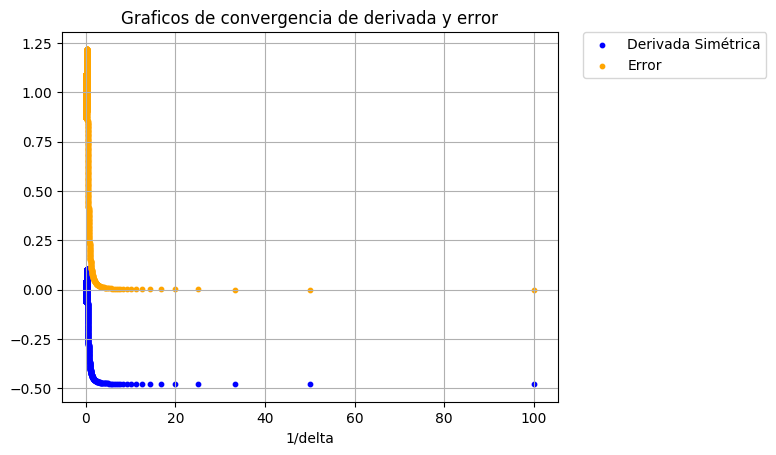

In [28]:
errorDerivadaSimetrica(x->cos(x),1/2)

La convergencia es mucho mas rápida, como puede verse. El error cuadrático lo podemos visualizar si alteramos nuestra funcion para que grafique respecto a delta, en vez de 1/delta.

In [29]:
function errorCuadDerivadaSimetrica(f::Function,punto::Float64)
    y = simplify(diff(f),[x])    
    errores = []
    deltas = []
    derivadasSimetricas = []
    delta = 20.0
    
    while (delta>0.001)
        
        push!(derivadasSimetricas,derivadaSimetrica(f,punto,delta))
        push!(errores,abs((derivadaSimetrica(f,punto,delta)-y(punto))/y(punto)))
        push!(deltas, delta)
        
        delta-=0.01
    end


    #=Una vez que hemos recolectado todos los errores y derivadas vamos a graficar=#
   
     #Grafico de puntos convergiendo
    plt.figure("the plot")
    plt.xlabel("delta")
    plt.title("Graficos de convergencia de derivada y error")
    plt.grid()
    plt.scatter(deltas,derivadasSimetricas,color = "blue",label = "Derivada Simétrica",s = 10)
    
    #Gráfico de error
    plt.scatter(deltas,errores,color = "orange",label = "Error",s=10)
    legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)
    plt.show()
    
end

errorCuadDerivadaSimetrica (generic function with 1 method)

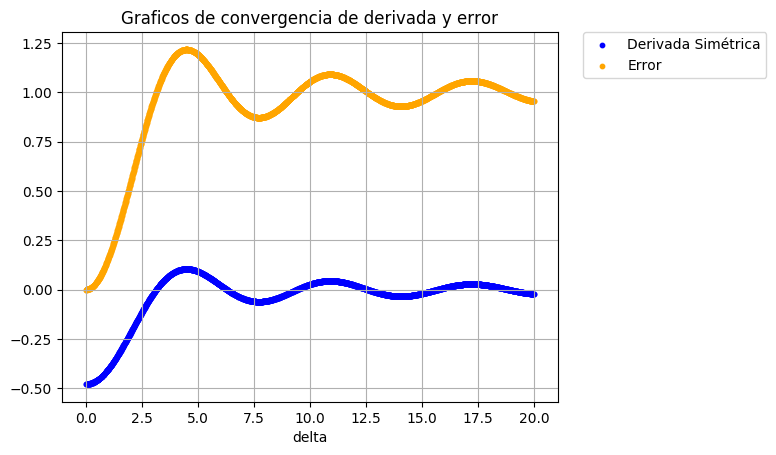

In [30]:
errorCuadDerivadaSimetrica(x->cos(x),1/2)

**Ejercicio 5:** Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente: $$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

**Linealidad**

Buscamos probar que $$\Delta_{h} (\alpha f +g) = \alpha \Delta_{h}(f) +\Delta_{h}(g)$$ 
donde $\alpha$ es un escalar. 

Demostración
$$\Delta_{h}(\alpha f +g) = \sum_{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n(\alpha f +g)}{dx^n}$$

Usando la linealidad del operador derivada 

$$ = \sum_{n = 1}^{\infty} \frac{h^n}{n!}\left[\alpha \frac{d^n f}{dx^2} +\frac{d^n g}{dx^2}\right]$$

Distributividad

$$= \sum_{n = 1}^{\infty} \left[\alpha\frac{h^n}{n!}\frac{d^n f}{dx^2} + \frac{h^n}{n!} \frac{d^n g}{dx^2}\right]$$

Usando la linealidad del operador suma 

$$ = \alpha \sum_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^2} +\sum_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n g}{dx^2}$$

$$= \alpha \Delta_{h}(f) +\Delta_{h}(g)$$

Q.E.D


**Ejercicio 6:** Para saber como se relaciona el operador derivada exacta con el operador diferencia finita hacia adelante es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma: $$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$

La sumatoria se parece bastante a $$e^x = \sum_{n = 0}^{\infty} \frac{x^n}{n!}$$

Podriamos pensar entonces 

$$\Delta_{h} = \sum_{n =1}^{\infty} \frac{h^n}{n!} \frac{d^n}{dx^n} = \sum_{n = 1}^{\infty} \frac{\left(h \frac{d}{dx}\right)^n}{n!} = \sum_{n = 0}^{\infty} \frac{\left(h \frac{d}{dx}\right)^n}{n!} -1$$

y asi 

$$\Delta_{h} = e^{h\frac{d}{dx}} -1$$

De aqui se podria derivar el operador derivada 

$$ln(\Delta_{h} +1) = h\frac{d}{dx}$$

$$\frac{d}{dx} = ln(\Delta_{h} +1)/h = \frac{1}{h}\left(\Delta_{h} -\frac{1}{2} \Delta_{h}^2+.....\right)$$ 



**Ejercicio 7:** Explotar la relación $\delta_h=\Delta_h-\Delta_{-h}$, donde $\delta_h:f(x)\mapsto f(x+h)-f(x-h)$, para encontrar cual es la función $\theta$ que relaciona a $\delta_h$ con el operador derivada exacta, es decir: $$\delta_h=\theta\left(h\left. \frac{d}{d\xi}\right|_{\xi=x}\right).$$
Una vez que la encuentren, despejen $\left. \frac{d}{d\xi}\right|_{\xi=x}$ y calculen la serie de Taylor de mánera similar a lo mostrado en las ecuaciones 3 y 4.

No deberia ser muy complicado. Sabemos 
$$f(x+h) = f(x) +f'(x)h +\frac{1}{2}f''(x)h^2 + ...$$

$$f(x-h)  = f(x) -f'(x)h + \frac{1}{2}f''(x)h^2 +....$$

Cuando restamos se nos van los terminos $h$ con potencias pares y las impares se duplican 

$$f(x+h) -f(x-h) = 2f'(x)h +2\frac{f^{(3)}(x)}{3!}h^3 +.....$$

$$= 2 \sum_{n = 0}^{\infty} h^{2n+1}\frac{\frac{d^{2n+1}f(x)}{dx^{2n+1}}}{(2n+1)!}  $$

consideremos el operador $2 \sum_{n = 0}^{\infty} h^{2n+1}\frac{\frac{d^{2n+1}}{dx^{2n+1}}}{(2n+1)!}$

$$\Delta_{h} -\Delta_{-h} = 2 \sum_{n = 0}^{\infty} h^{2n+1}\frac{\frac{d^{2n+1}}{dx^{2n+1}}}{n!} = 2\sum_{n = 0}^{\infty}\frac{\left(h\frac{d}{dx}\right)^{2n+1}}{(2n+1)!}$$

Y esto se parece a la serie del seno hiperbólico

$$sinh(x) = \sum_{n= 0}^{\infty} \frac{x^{(2n+1)}}{(2n+1)!}$$

Se tiene entonces $$2 sinh\left(h \frac{d}{dx}\right) = \Delta_{h} + \Delta_{-h} $$

Asi, $$arsinh\left(\frac{\Delta_{h} +\Delta_{-h}}{2}\right) = h\frac{d}{dx}$$
$$\frac{d}{dx} = \frac{1}{h} arsinh\left(\frac{\Delta_{h} + \Delta_{-h}}{2}\right) = \frac{1}{h} arsinh\left(\frac{\delta_{h}}{2}\right)$$

$$= \frac{1}{h} \sum_{n = 0}^{\infty} \frac{(-1)^n (2n)!}{2^{2n} (n!)^2}\left(\frac{\delta}{2}\right)^{2n}$$


Calculemos solo el primer termino, el cual nos deberia dar la derivada simétrica que ya sacamos. 

$$\frac{df}{dx} = \frac{1}{h} \frac{1*1}{1*1} \left(\frac{\delta f}{2}\right)^1 = \frac{\delta f}{2h} = \frac{f(x+h)-f(x-h)}{2h}$$